You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)  
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables.

#### Load Diabetes dataset (Kaggle)

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.shape

(768, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


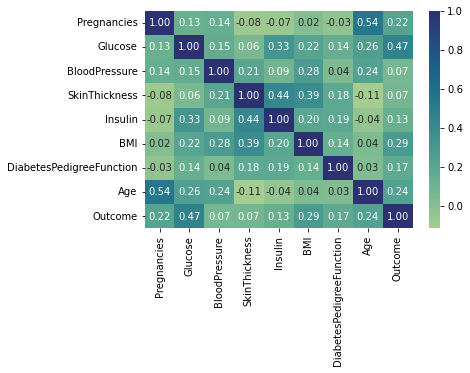

In [52]:
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="crest")
plt.show()

In [53]:
df.describe().T  #tranpose

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


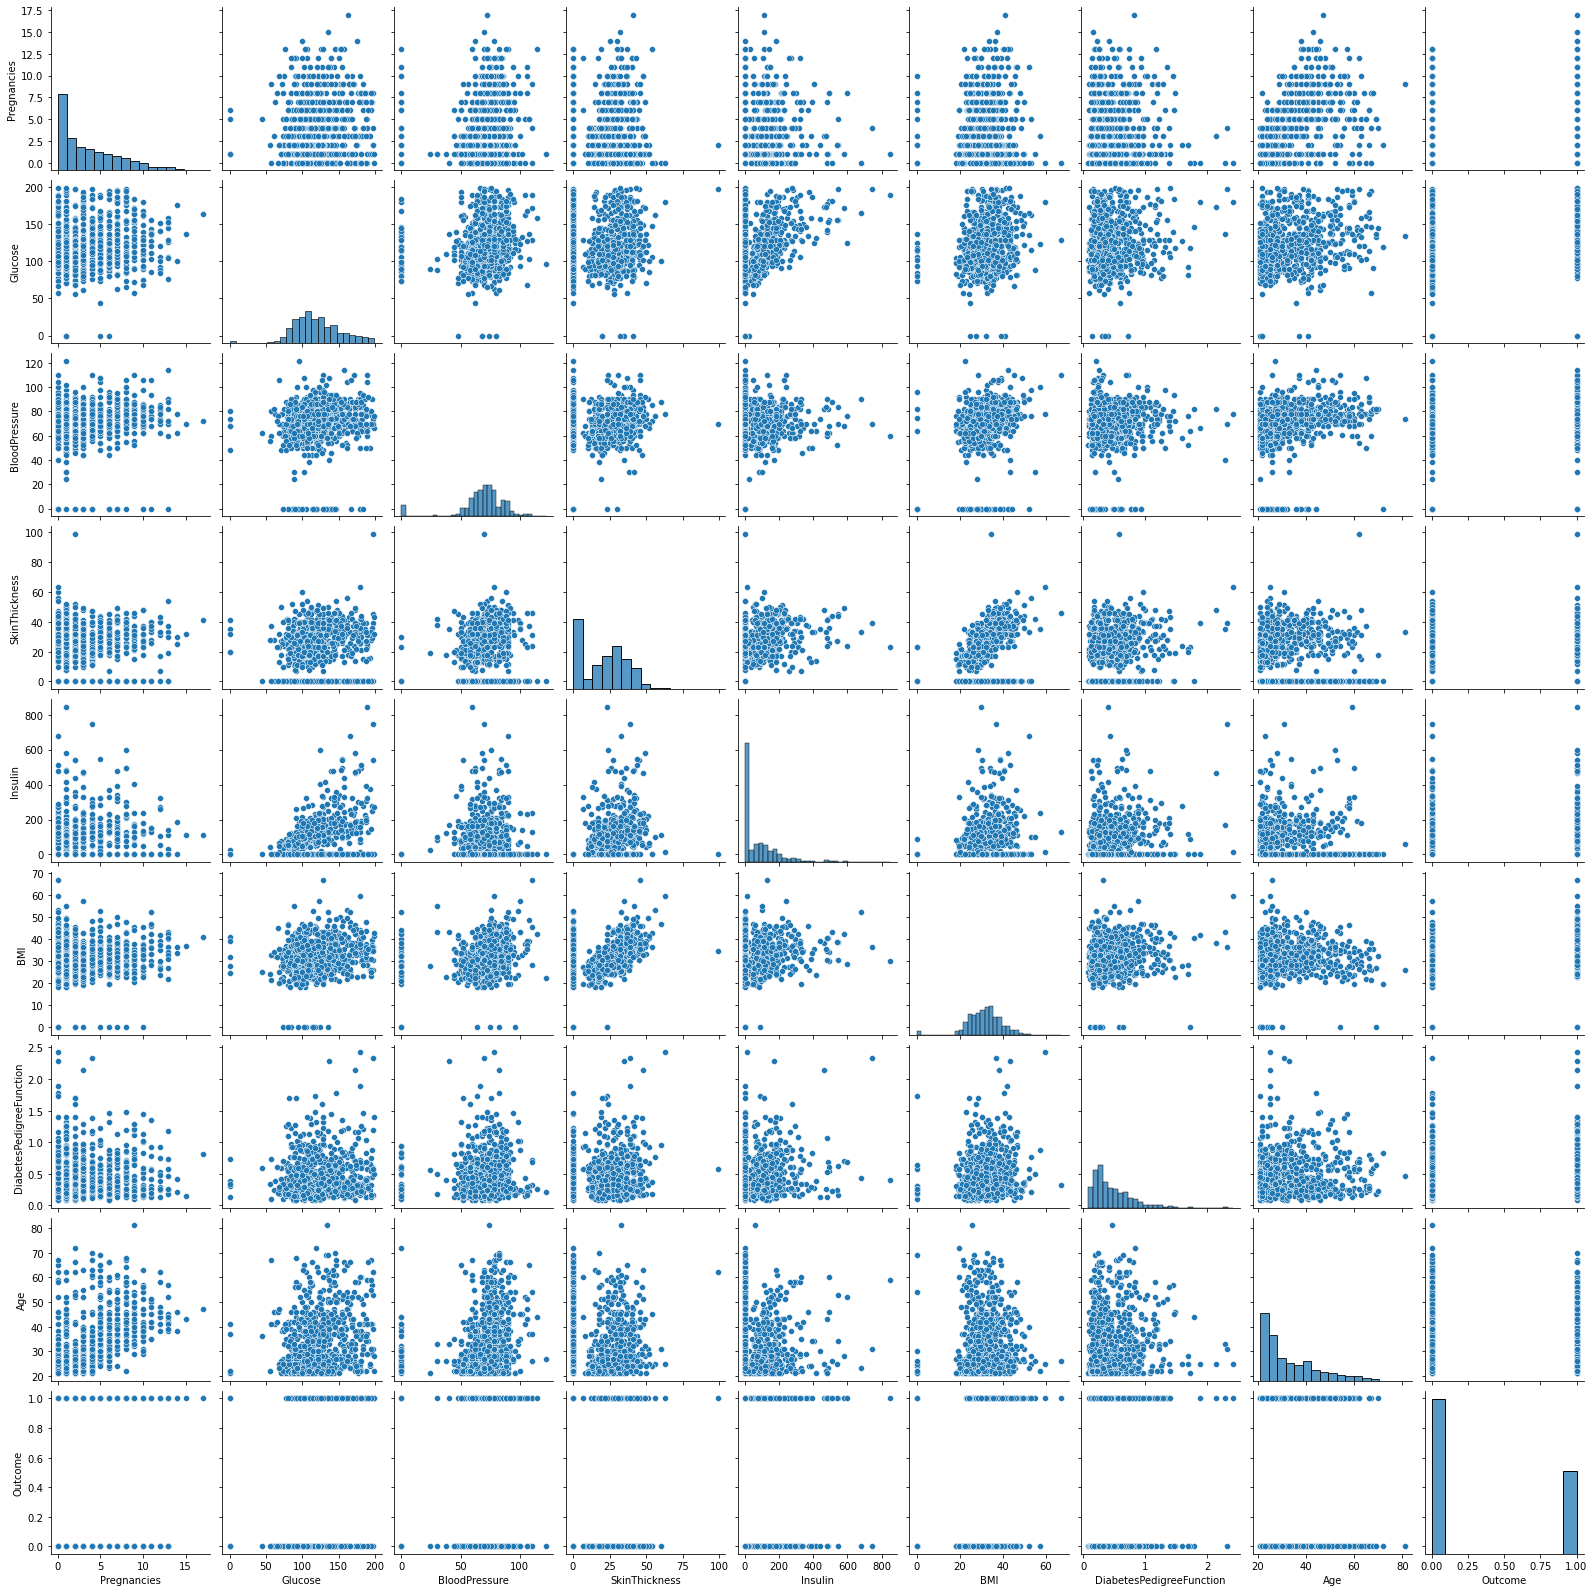

In [54]:
sns.pairplot(df)

In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

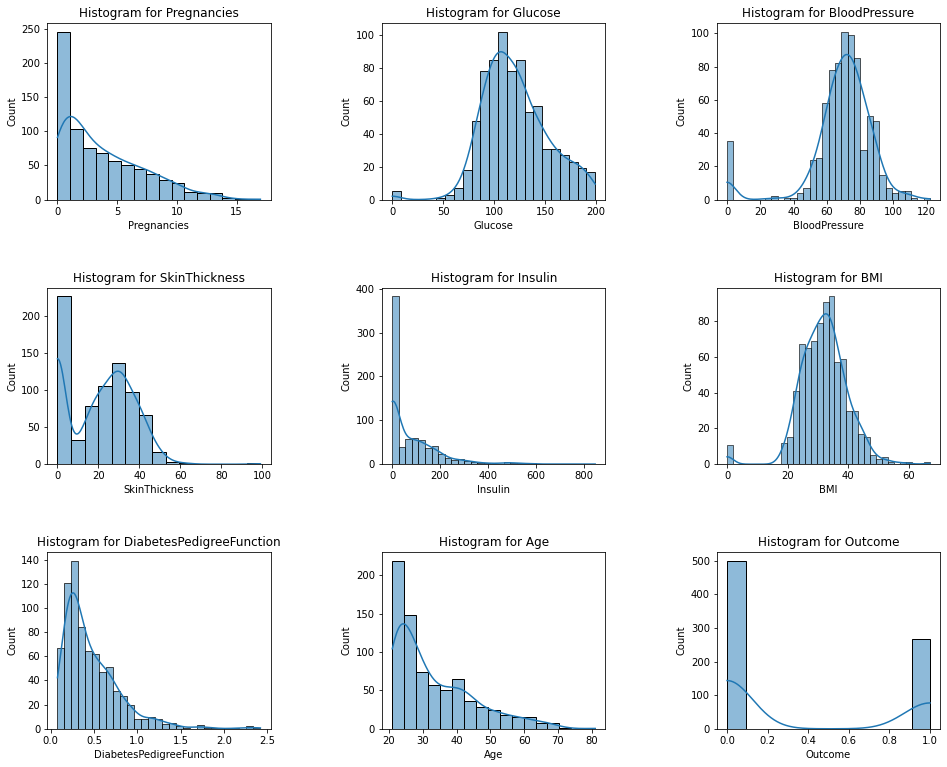

In [11]:
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true')
    plt.title(f'Histogram for {i}')
plt.show()

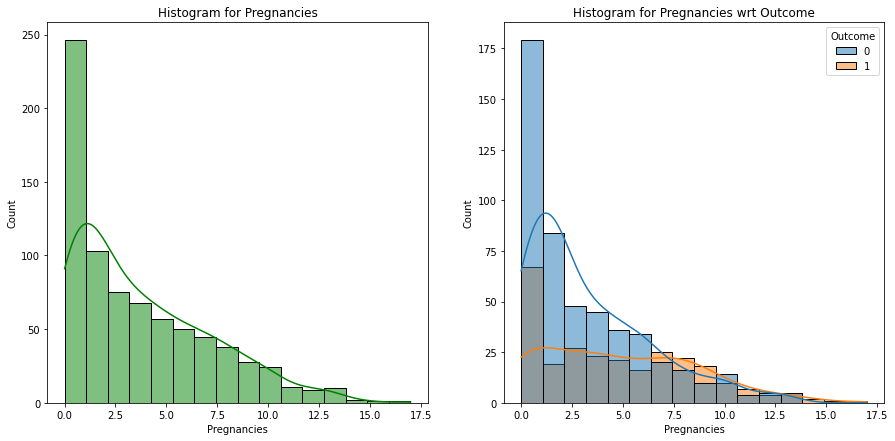

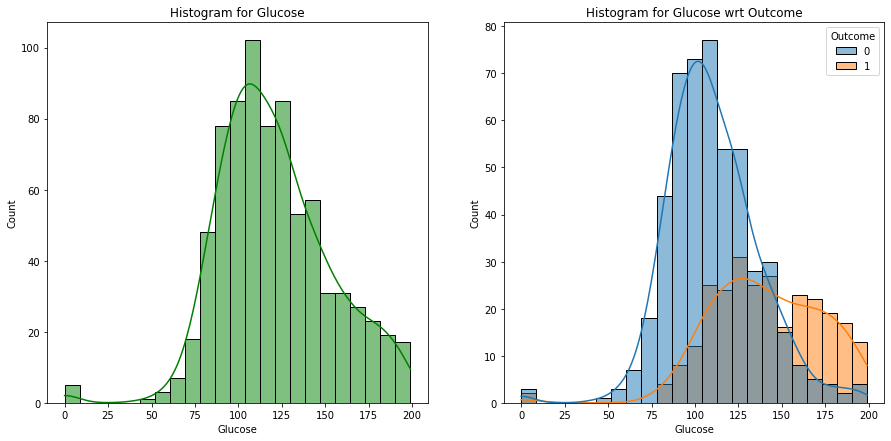

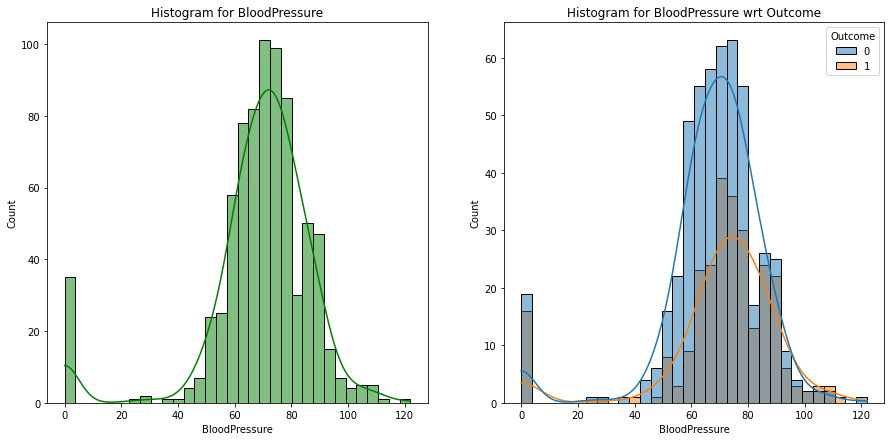

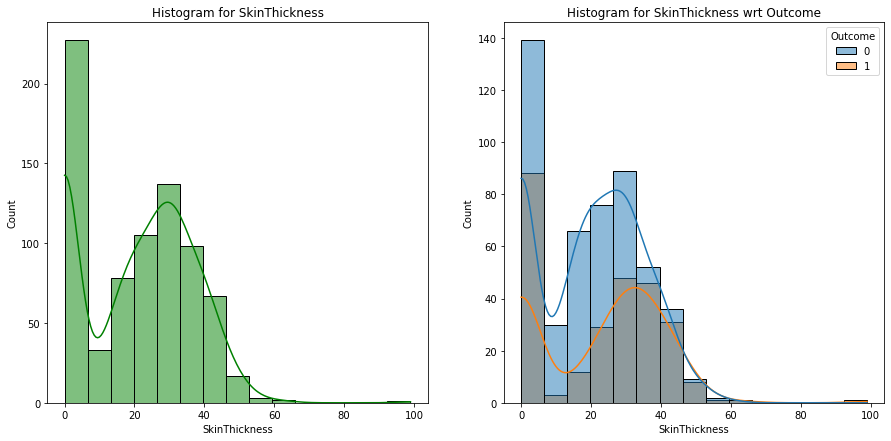

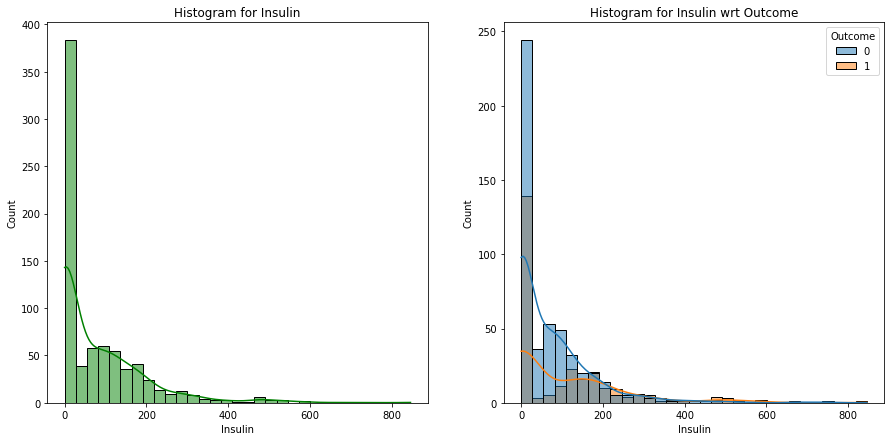

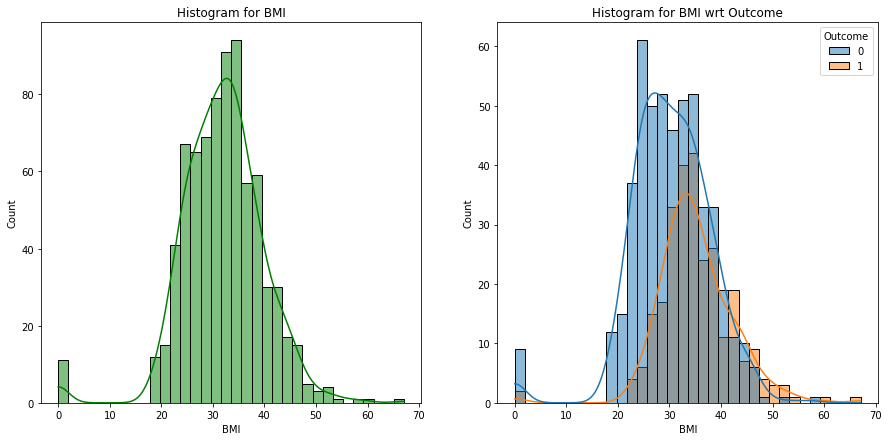

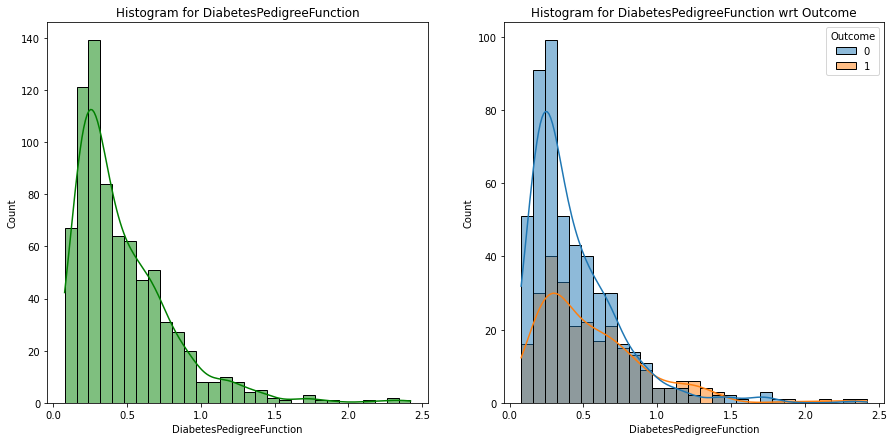

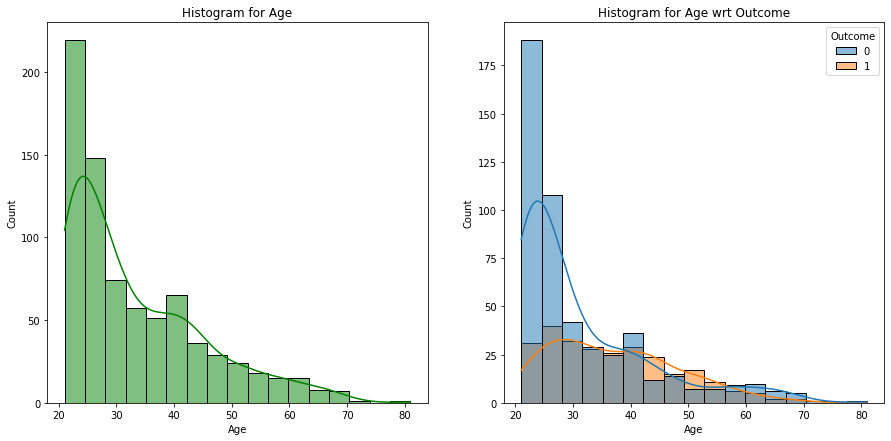

In [12]:
# Univariate Analysis with respect to Outcome column
for i in df.columns:
    if i != 'Outcome':
        fig, ax = plt.subplots(1,2,figsize=(15,7))
        plt.subplot(121)
        sns.histplot(data=df,x=i,kde=True,bins='fd',color='g')
        plt.title(f'Histogram for {i}')
        plt.subplot(122)
        sns.histplot(data=df,x=i,kde=True,bins='fd',hue='Outcome')
        plt.title(f'Histogram for {i} wrt Outcome')
        plt.show()

### Observation

* There is imbalance in the outcome column for class 0 --> 500 values and for class 1 --> 268
* There are 0 as values in various columns as in the above histogram we will replace them with median
* Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction these columns 0 values will be replaced with their respective column medians

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [14]:
cols_zero_val = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in cols_zero_val:    
    print(f'{i} : {len(df[df[i]==0])}')

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [15]:
for i in cols_zero_val:
    df[i] = df[i].replace(0,df[i].median())

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

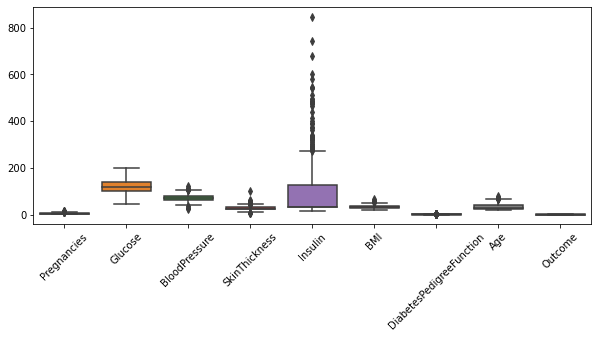

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()

##### There are outliers but its not necessary to remove them as the Descision Tree Algorithm is not sensitive to outliers

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [21]:
#Dependent and independent features
X = df.iloc[:,:-1]
y = df["Outcome"]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size=0.33)

In [24]:
X_train.shape , X_test.shape

((514, 8), (254, 8))

In [28]:
y_train.shape , y_test.shape

((514,), (254,))

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Training Accuracy: 76.85%
Testing Accuracy: 76.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       155
           1       0.77      0.57      0.65        99

    accuracy                           0.76       254
   macro avg       0.76      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254


Confusion Matrix:
 [[138  17]
 [ 43  56]]


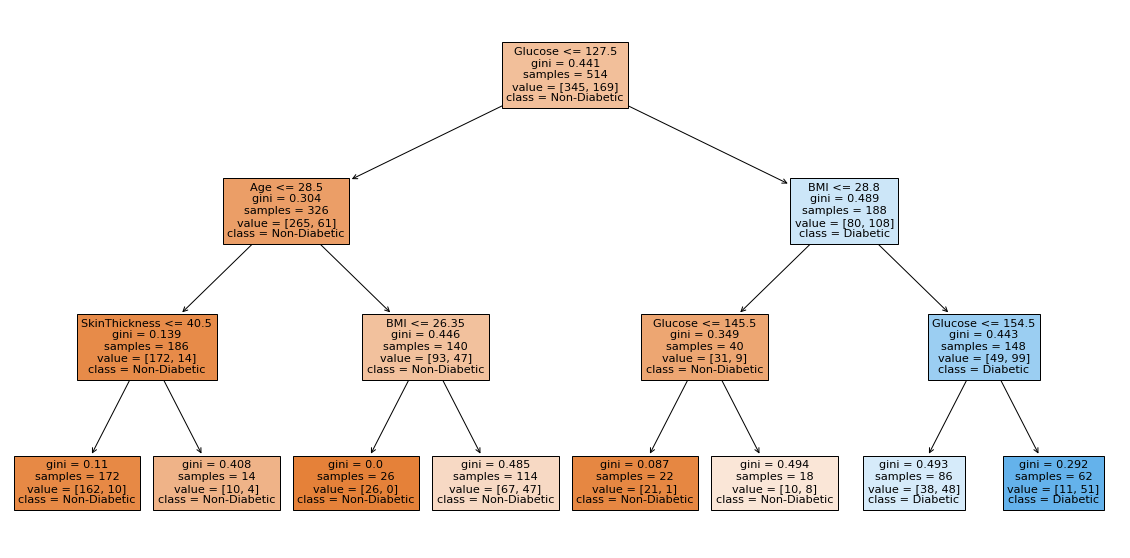

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # 'entropy' simulates ID3
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the final model with best params
best_model = grid_search.best_estimator_

# Predict on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
print("\nTraining Accuracy: {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100))
print("Testing Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Visualize the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"])
plt.show()

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy : 0.7792207792207793
Precision: 0.6981132075471698
Recall   : 0.6727272727272727
F1 Score : 0.6851851851851852


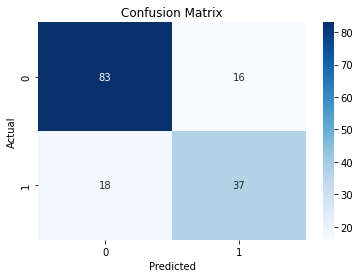

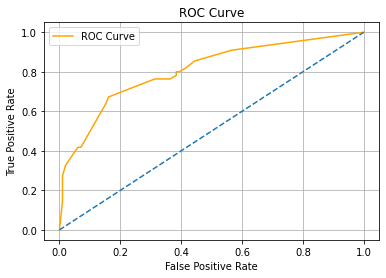

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree with GridSearchCV
dtree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:,1]

# Evaluation Metrics
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, color='orange', label='ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [37]:
model = DecisionTreeClassifier(**clf.best_params_)   # First line: Create a new Decision Tree using the best settings found by GridSearchCV.
model.fit(X_train,y_train)                           # Second line: Train that optimized Decision Tree on your training data

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       splitter='random')

In [38]:
y_pred=model.predict(X_test)

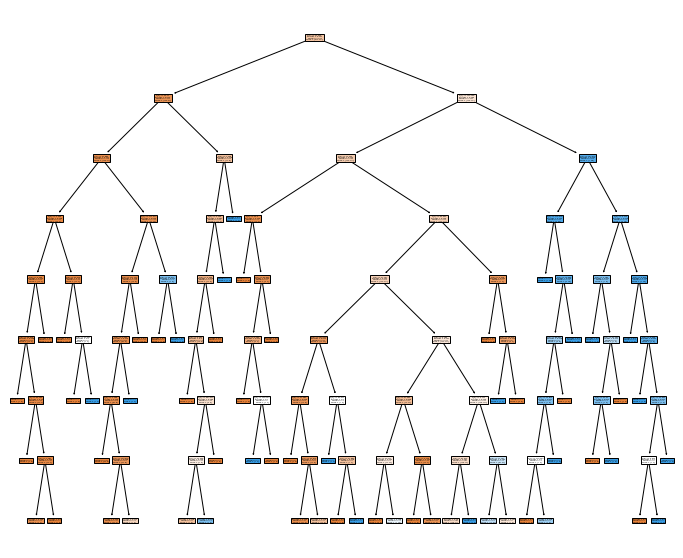

In [39]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)
plt.show()

In [40]:
model.feature_importances_

array([0.0804279 , 0.25321447, 0.03175315, 0.11113023, 0.04906752,
       0.14888797, 0.0729577 , 0.25256106])

In [41]:
imp = model.feature_importances_
imp = pd.Series(imp)
imp.index = X_train.columns
imp = imp.sort_values(ascending=False)
imp

Glucose                     0.253214
Age                         0.252561
BMI                         0.148888
SkinThickness               0.111130
Pregnancies                 0.080428
DiabetesPedigreeFunction    0.072958
Insulin                     0.049068
BloodPressure               0.031753
dtype: float64

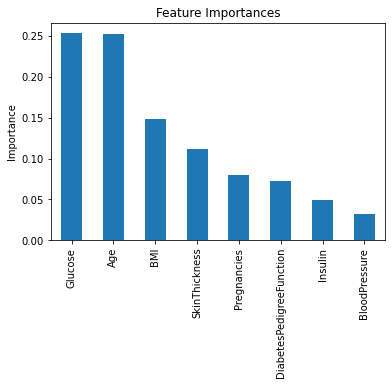

In [42]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')
plt.show()

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [43]:
new_data = [6,120,22,35,120,18.4,0.90,45]

In [44]:
y_pred = model.predict([new_data])

In [45]:
y_pred[0]

0

In [46]:
if y_pred[0] == 1:
    print("Diabetic")
else :
    print("Not Diabetic")

Not Diabetic
